In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
from pandas.plotting import parallel_coordinates

In [34]:
Data = pd.read_csv("my_movies.csv")
Data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [35]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [36]:
Data.shape

(10, 15)

In [37]:
df = pd.get_dummies(Data)
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0


In [38]:
df.shape

(10, 25)

In [39]:
frequent_itemsets =  apriori(df,min_support=0.02,use_colnames=True,max_len=3)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
...,...,...,...
337,0.1,"(V4_Green Mile, V2_LOTR, V3_Gladiator)",3
338,0.1,"(V4_Green Mile, V2_LOTR1, V3_Harry Potter1)",3
339,0.1,"(V5_LOTR2, V2_LOTR1, V3_Harry Potter1)",3
340,0.1,"(V5_LOTR2, V2_LOTR1, V4_Green Mile)",3


In [40]:
freq1=frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.02) ]
freq1.shape

(25, 3)

In [41]:
freq2=frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.02) ]
freq2.shape

(101, 3)

In [42]:
freq3=frequent_itemsets[ (frequent_itemsets['length'] == 3) &
                   (frequent_itemsets['support'] >= 0.02) ]
freq3.shape

(216, 3)

rules derived from the frequent itemsets only if the level of confidence is above the 70 percent threshold (min_threshold=0.7):

In [43]:
from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
883,"(V4_Green Mile, V5_LOTR2)",(V3_Harry Potter1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
884,"(V4_Green Mile, V3_Harry Potter1)",(V5_LOTR2),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
885,"(V5_LOTR2, V3_Harry Potter1)",(V4_Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
886,(V5_LOTR2),"(V4_Green Mile, V3_Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


rules that have a lift score of >= 1.2

In [44]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
2,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.20
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
1441,"(V4_Green Mile, V3_Harry Potter1)",(V5_LOTR2),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
1442,"(V5_LOTR2, V3_Harry Potter1)",(V4_Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
1443,(V4_Green Mile),"(V5_LOTR2, V3_Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
1444,(V5_LOTR2),"(V4_Green Mile, V3_Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


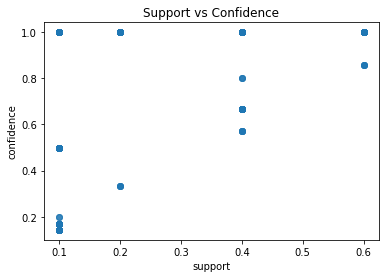

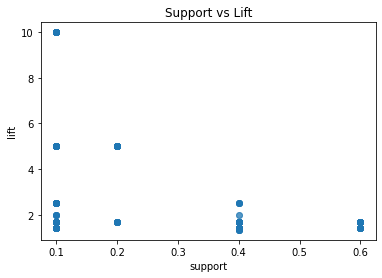

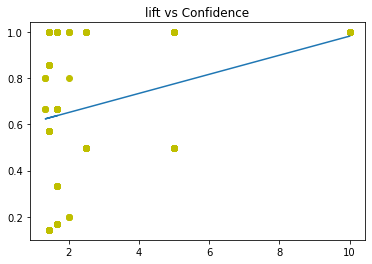

In [45]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'],rules['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()
plt.scatter(rules['support'],rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.title('lift vs Confidence')
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

In [46]:
rules['antecedent'] = rules['antecedents'].apply(lambda antecedents : list(antecedents)[0])
rules['consequent'] = rules['consequents'].apply(lambda consequents : list(consequents)[0])
rules['rule'] = rules.index
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent,consequent,rule
0,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,Sixth Sense,LOTR,0
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,LOTR,Sixth Sense,1
2,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.20,Sixth Sense,Green Mile,2
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,Green Mile,Sixth Sense,3
4,(V1_Sixth Sense),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,V1_Sixth Sense,Sixth Sense,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1441,"(V4_Green Mile, V3_Harry Potter1)",(V5_LOTR2),0.1,0.1,0.1,1.000000,10.000000,0.09,inf,V4_Green Mile,V5_LOTR2,1441
1442,"(V5_LOTR2, V3_Harry Potter1)",(V4_Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf,V5_LOTR2,V4_Green Mile,1442
1443,(V4_Green Mile),"(V5_LOTR2, V3_Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,V4_Green Mile,V5_LOTR2,1443
1444,(V5_LOTR2),"(V4_Green Mile, V3_Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,V5_LOTR2,V4_Green Mile,1444


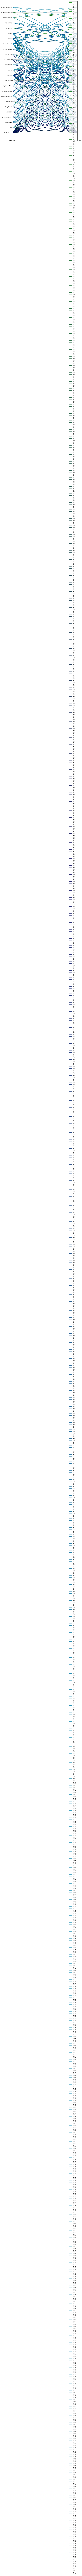

In [47]:
plt.figure(figsize=(20, 20), dpi= 80)
plt.subplot(1, 2, 1)
cords = rules[['antecedent','consequent','rule']]
parallel_coordinates(cords,'rule',colormap = 'ocean')
plt.show()